In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
trips_df=pd.read_csv("C:\\Users\\kapur\\Downloads\\uber_trip_data.csv")
trips_df

# Condition On Payment types numeric to text types

In [ ]:
trips_df["payment_type"]=trips_df["payment_type"].astype(int)
trips_df["payment_type"]

In [ ]:
payments={1:"Google pay",2:"Uber Pay",3:"Cash"}
trips_df["payment_type"]=trips_df["payment_type"].map(payments)

In [ ]:
trips_df

In [ ]:
trips_df.head(10)

In [ ]:
trips_df.columns

# Datatype change of columns

In [ ]:
trips_df["pickup_time"]=pd.to_datetime(trips_df["pickup_time"],dayfirst=True)

In [ ]:
trips_df["drop_time"]=pd.to_datetime(trips_df["drop_time"],dayfirst=True)

In [ ]:
trips_df.info()

# adding new column

In [14]:
trips_df["duration"]=trips_df['drop_time']-trips_df['pickup_time']
trips_df["duration"]

0      0 days 00:30:00
1      0 days 00:49:00
2      0 days 00:12:00
3      0 days 00:58:00
4      0 days 00:13:00
             ...      
9495   0 days 00:06:00
9496   0 days 00:44:00
9497   0 days 00:42:00
9498   0 days 00:31:00
9499   0 days 00:15:00
Name: duration, Length: 9500, dtype: timedelta64[ns]

In [15]:
trips_df["duration"]=trips_df["duration"].dt.total_seconds()/60
trips_df["duration"]=trips_df["duration"].round(2)

In [16]:
trips_df["duration"]=trips_df["duration"].astype(int)

In [17]:
trips_df

,trip_id,pickup_time,drop_time,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,surge_fare,duration
0,1,2025-04-30 02:25:00,2025-04-30 02:55:00,4,6.24,18,173,Google pay,15.18,4.98,30
1,2,2025-04-06 01:36:00,2025-04-06 02:25:00,5,17.08,54,35,Uber Pay,37.22,0.02,49
2,3,2025-04-02 03:19:00,2025-04-02 03:31:00,3,9.78,97,77,Cash,22.38,3.51,12
3,4,2025-04-13 12:24:00,2025-04-13 13:22:00,5,2.99,234,185,Google pay,8.58,0.11,58
4,5,2025-04-12 03:29:00,2025-04-12 03:42:00,5,20.71,240,55,Uber Pay,44.59,6.83,13
...,...,...,...,...,...,...,...,...,...,...,...
9495,9496,2025-04-25 07:22:00,2025-04-25 07:28:00,6,22.11,8,12,Cash,47.44,3.41,6
9496,9497,2025-04-26 15:02:00,2025-04-26 15:46:00,5,10.66,183,187,Cash,24.17,5.01,44
9497,9498,2025-04-04 04:23:00,2025-04-04 05:05:00,1,20.10,77,169,Cash,43.35,0.50,42
9498,9499,2025-04-14 16:22:00,2025-04-14 16:53:00,1,27.03,67,106,Cash,57.44,5.65,31


# load another file

In [18]:
location_df=pd.read_csv("C:\\Users\\kapur\\Downloads\\location_data.csv")
location_df

,id,location_name
0,1,Bangalore
1,2,Nashik
2,3,Bangalore
3,4,Hyderabad
4,5,Thiruvananthapuram
...,...,...
945,946,Jaipur
946,947,Varanasi
947,948,Jaipur
948,949,Visakhapatnam


In [19]:
location_df.columns

Index(['id', 'location_name'], dtype='object')

In [20]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             950 non-null    int64 
 1   location_name  950 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.0+ KB


In [21]:
trips_df.isnull().sum()

trip_id             0
pickup_time         0
drop_time           0
passenger_count     0
trip_distance       0
PULocationID        0
DOLocationID        0
payment_type       11
fare_amount         0
surge_fare          0
duration            0
dtype: int64

In [22]:
trips_df["payment_type"]=trips_df["payment_type"].fillna(value=trips_df["payment_type"].bfill())
trips_df["payment_type"]

0       Google pay
1         Uber Pay
2             Cash
3       Google pay
4         Uber Pay
           ...    
9495          Cash
9496          Cash
9497          Cash
9498          Cash
9499          Cash
Name: payment_type, Length: 9500, dtype: object

In [27]:
trips_df.duplicated().sum()

np.int64(0)

In [24]:
trips_df["trip_id"].duplicated().sum()

np.int64(0)

In [25]:
trips_df["trip_id"].count()

np.int64(9500)

In [26]:
pickup_top5=trips_df["pickup_time"].value_counts().head(5)
pickup_top5

pickup_time
2025-04-26 04:16:00    4
2025-04-14 02:10:00    4
2025-04-30 17:59:00    3
2025-04-15 06:19:00    3
2025-04-27 01:33:00    3
Name: count, dtype: int64

<Axes: xlabel='pickup_time'>

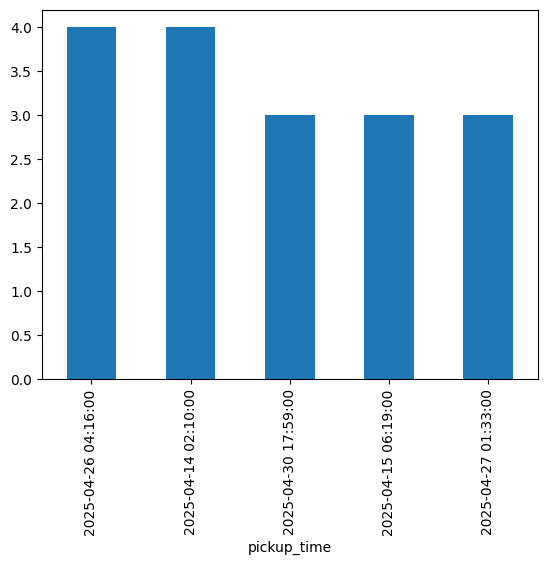

In [25]:
pickup_top5.plot(kind="bar")

In [97]:
trips_df["drop_time"].value_counts().head(5)

drop_time
2025-04-11 23:31:00    4
2025-04-20 12:01:00    4
2025-04-08 04:08:00    4
2025-04-26 16:06:00    4
2025-04-22 17:03:00    4
Name: count, dtype: int64

In [21]:
count_types=trips_df.groupby("payment_type").count()
count_types

,trip_id,pickup_time,drop_time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,surge_fare,duration
payment_type,,,,,,,,,,
Cash,9216,9216,9216,9216,9216,9216,9216,9216,9216,9216
Google pay,265,265,265,265,265,265,265,265,265,265
Uber Pay,19,19,19,19,19,19,19,19,19,19


In [22]:
trips_df["trip_distance"].mean()

np.float64(15.331126315789476)

In [109]:
trips_df["trip_distance"].describe()

count    9500.000000
mean       15.331126
std         8.469005
min         0.500000
25%         8.150000
50%        15.430000
75%        22.550000
max        30.000000
Name: trip_distance, dtype: float64

In [111]:
trips_df["fare_amount"].mean()

np.float64(33.66114947368421)

In [112]:
trips_df["fare_amount"].describe()

count    9500.000000
mean       33.661149
std        17.213569
min         3.520000
25%        19.070000
50%        33.860000
75%        48.330000
max        63.480000
Name: fare_amount, dtype: float64

In [122]:
trips_df["pickup_time"].nunique()

8537

In [123]:
trips_df["drop_time"].nunique()

8488

In [23]:
months=trips_df["pickup_time"].dt.month_name()
months

0       April
1       April
2       April
3       April
4       April
        ...  
9495    April
9496    April
9497    April
9498    April
9499    April
Name: pickup_time, Length: 9500, dtype: object

In [24]:
year=trips_df["drop_time"].dt.year
year

0       2025
1       2025
2       2025
3       2025
4       2025
        ... 
9495    2025
9496    2025
9497    2025
9498    2025
9499    2025
Name: drop_time, Length: 9500, dtype: int32

In [25]:
day=trips_df["pickup_time"].dt.day
day

0       30
1        6
2        2
3       13
4       12
        ..
9495    25
9496    26
9497     4
9498    14
9499     5
Name: pickup_time, Length: 9500, dtype: int32

In [71]:
trips_by_day=trips_df.groupby(trips_df["pickup_time"].dt.day)["trip_id"].count().sort_values(ascending=False)
trips_by_day

pickup_time
30    355
21    351
7     344
26    338
19    335
5     335
27    333
23    332
14    329
6     325
15    324
8     320
28    319
4     318
13    315
25    314
22    313
18    313
3     313
17    311
29    307
24    305
16    303
11    302
20    299
12    297
10    296
2     295
9     280
1     279
Name: trip_id, dtype: int64

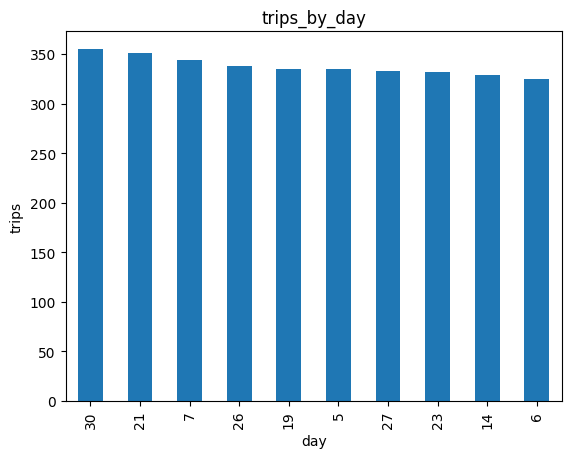

In [76]:
trips_by_day.head(10).plot(kind='bar')
plt.xlabel("day")
plt.ylabel("trips")
plt.title("trips_by_day")
plt.show()

In [28]:
trips_df.groupby("pickup_time")["drop_time"].value_counts().sort_values(ascending=False).head(10)

pickup_time          drop_time          
2025-04-10 03:11:00  2025-04-10 04:01:00    2
2025-04-04 05:59:00  2025-04-04 06:33:00    2
2025-04-15 08:33:00  2025-04-15 09:18:00    2
2025-04-06 07:37:00  2025-04-06 08:11:00    2
2025-04-09 13:35:00  2025-04-09 14:16:00    2
2025-04-10 04:33:00  2025-04-10 05:31:00    2
2025-04-08 08:13:00  2025-04-08 08:50:00    2
2025-04-04 02:56:00  2025-04-04 03:06:00    2
2025-04-08 05:38:00  2025-04-08 06:00:00    2
2025-04-02 08:12:00  2025-04-02 08:22:00    2
Name: count, dtype: int64

In [29]:
trips_df.groupby("PULocationID")["fare_amount"].mean()

PULocationID
1      36.188571
2      32.185833
3      35.894722
4      34.578947
5      34.134571
         ...    
259    33.583478
260    31.489394
261    30.648718
262    37.318158
263    32.487500
Name: fare_amount, Length: 263, dtype: float64

In [30]:
avg_fare_by_type=trips_df.groupby("payment_type")["fare_amount"].mean()
avg_fare_by_type

payment_type
Cash          33.681558
Google pay    32.989660
Uber Pay      33.127368
Name: fare_amount, dtype: float64

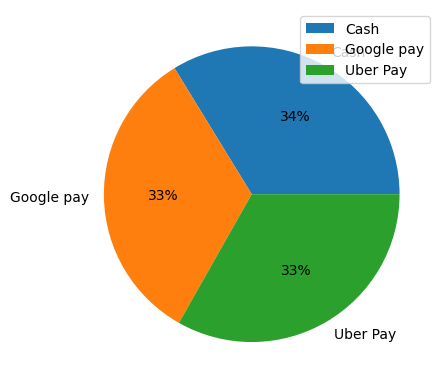

In [31]:
avg_fare_by_type.plot(kind='pie',autopct='%.0f%%')
plt.ylabel(" ")
plt.legend()
plt.show()

In [32]:
trips_df["trip_distance"].sum()

np.float64(145645.7)

In [33]:
trips_df

,trip_id,pickup_time,drop_time,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,surge_fare,duration
0,1,2025-04-30 02:25:00,2025-04-30 02:55:00,4,6.24,18,173,Google pay,15.18,4.98,30
1,2,2025-04-06 01:36:00,2025-04-06 02:25:00,5,17.08,54,35,Uber Pay,37.22,0.02,49
2,3,2025-04-02 03:19:00,2025-04-02 03:31:00,3,9.78,97,77,Cash,22.38,3.51,12
3,4,2025-04-13 12:24:00,2025-04-13 13:22:00,5,2.99,234,185,Google pay,8.58,0.11,58
4,5,2025-04-12 03:29:00,2025-04-12 03:42:00,5,20.71,240,55,Uber Pay,44.59,6.83,13
...,...,...,...,...,...,...,...,...,...,...,...
9495,9496,2025-04-25 07:22:00,2025-04-25 07:28:00,6,22.11,8,12,Cash,47.44,3.41,6
9496,9497,2025-04-26 15:02:00,2025-04-26 15:46:00,5,10.66,183,187,Cash,24.17,5.01,44
9497,9498,2025-04-04 04:23:00,2025-04-04 05:05:00,1,20.10,77,169,Cash,43.35,0.50,42
9498,9499,2025-04-14 16:22:00,2025-04-14 16:53:00,1,27.03,67,106,Cash,57.44,5.65,31


In [36]:
Distribution_of_payment_types=trips_df.groupby("payment_type")["trip_id"].count()
Distribution_of_payment_types

payment_type
Cash          9216
Google pay     265
Uber Pay        19
Name: trip_id, dtype: int64

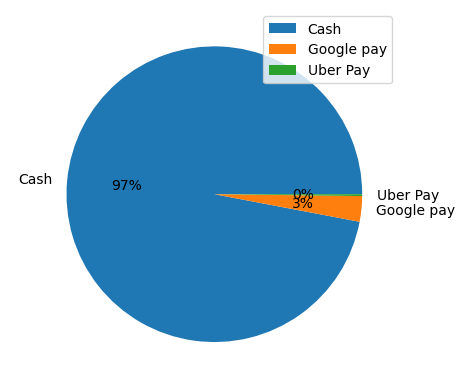

In [41]:
Distribution_of_payment_types.plot(kind='pie',autopct="%.0f%%")
plt.legend()
plt.ylabel(" ")
plt.show()

In [42]:
revenue=trips_df["fare_amount"].sum()
revenue

np.float64(319780.92)

In [44]:
revenue_by_payment_type=trips_df.groupby("payment_type")["fare_amount"].sum()
revenue_by_payment_type

payment_type
Cash          310409.24
Google pay      8742.26
Uber Pay         629.42
Name: fare_amount, dtype: float64

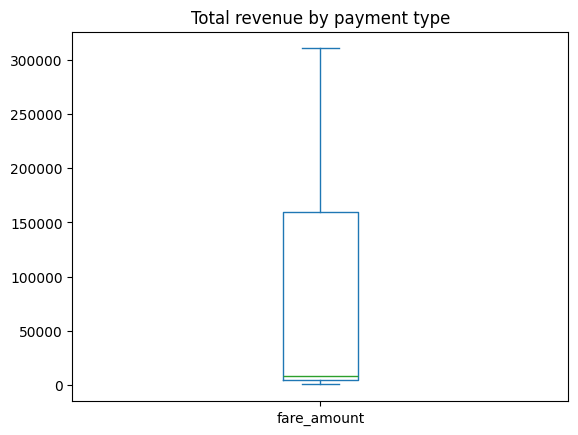

In [51]:
revenue_by_payment_type.plot(kind='box')
plt.title("Total revenue by payment type")
plt.show()

In [53]:
Trip_duration_stats=trips_df["duration"].mean().round(2)
Trip_duration_stats

np.float64(32.41)

In [55]:
max_trip_duration=trips_df["duration"].max()
max_trip_duration

np.int64(60)

In [69]:
hour=trips_df["pickup_time"].dt.hour.sort_values(ascending=False)
hour

17      23
9487    23
9441    23
45      23
9465    23
        ..
1201     0
1220     0
8047     0
8051     0
8072     0
Name: pickup_time, Length: 9500, dtype: int32

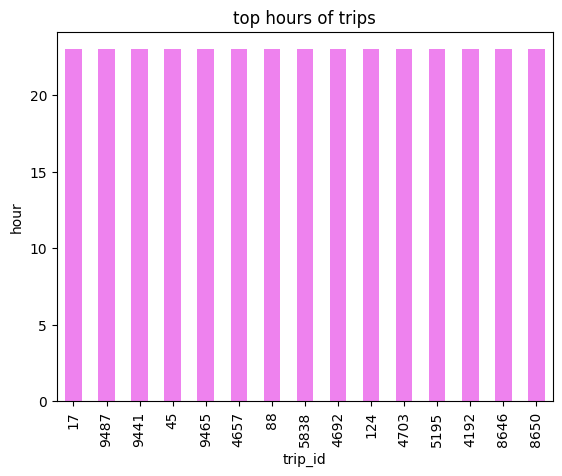

In [95]:
hour.head(15).plot(kind='bar',color='violet')
plt.title("top hours of trips")
plt.xlabel("trip_id")
plt.ylabel("hour")
plt.show()

In [86]:
trips_over_time=trips_df.groupby("pickup_time")["trip_id"].count().sort_values(ascending=False)
trips_over_time

pickup_time
2025-04-14 02:10:00    4
2025-04-26 04:16:00    4
2025-04-12 09:49:00    3
2025-04-11 21:19:00    3
2025-04-05 23:27:00    3
                      ..
2025-04-30 21:28:00    1
2025-04-02 21:26:00    1
2025-04-30 21:32:00    1
2025-04-30 21:34:00    1
2025-04-01 00:26:00    1
Name: trip_id, Length: 8537, dtype: int64

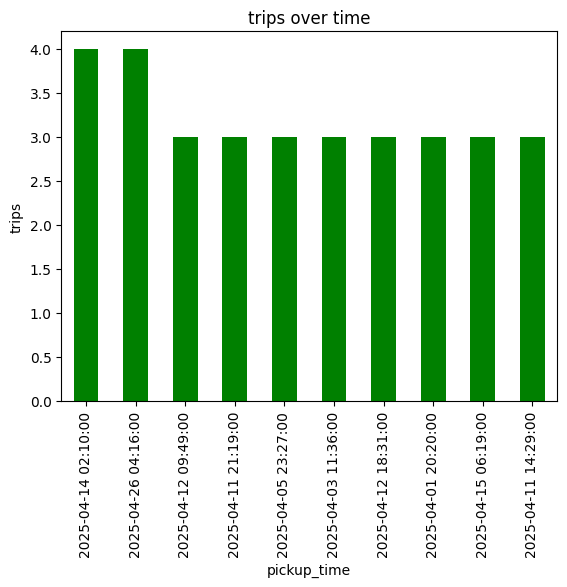

In [90]:
trips_over_time.head(10).plot(kind='bar',color='green')
plt.title("trips over time")
plt.ylabel("trips")
plt.show()

In [99]:
trips_per_hour=trips_df.groupby(trips_df["pickup_time"].dt.hour)["trip_id"].count()
trips_per_hour

pickup_time
0     416
1     425
2     401
3     408
4     399
5     403
6     384
7     380
8     402
9     397
10    413
11    387
12    370
13    417
14    373
15    420
16    367
17    408
18    371
19    378
20    423
21    368
22    401
23    389
Name: trip_id, dtype: int64

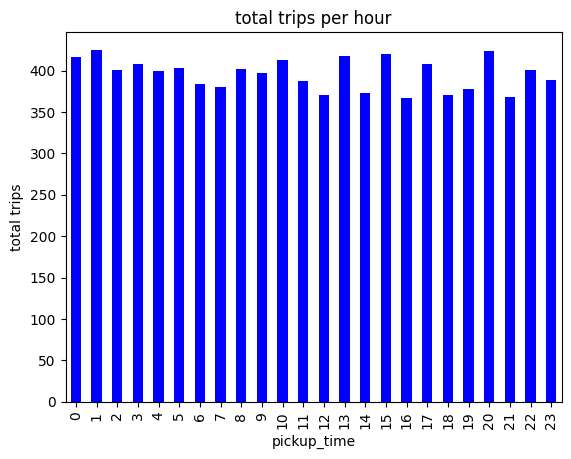

In [105]:
trips_per_hour.plot(kind='bar',color='blue')
plt.title("total trips per hour")
plt.ylabel("total trips")
plt.show()

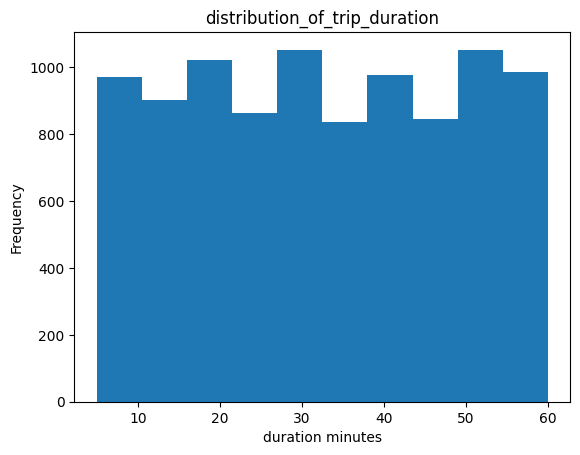

In [30]:
trips_df["duration"].plot(kind='hist')
plt.title("distribution_of_trip_duration")
plt.xlabel("duration minutes")
plt.show()

In [38]:
average_trip_duration_by_hour=trips_df.groupby(trips_df["pickup_time"].dt.hour)["duration"].mean()
average_trip_duration_by_hour

pickup_time
0     32.733173
1     33.230588
2     33.486284
3     32.218137
4     33.817043
5     31.163772
6     32.122396
7     31.671053
8     32.763682
9     33.282116
10    32.576271
11    32.677003
12    33.697297
13    31.832134
14    32.101877
15    32.785714
16    32.209809
17    32.075980
18    32.336927
19    32.261905
20    32.394799
21    31.717391
22    31.152120
23    31.442159
Name: duration, dtype: float64

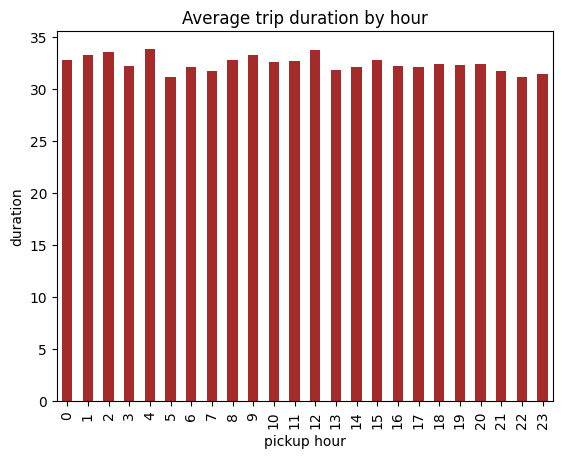

In [42]:
average_trip_duration_by_hour.plot(kind='bar',color='brown')
plt.title("Average trip duration by hour")
plt.xlabel("pickup hour")
plt.ylabel("duration")
plt.show()

In [ ]:
trips_df["fare_amount"].plot(kind='hist')

In [ ]:
trips_df.groupby("pickup_time")["fare_amount"].sum()